### Student Information
Name: 林貝芸 Lin,Pei-Yun

Student ID: 113086852

GitHub ID: u105500014-wq

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [13]:
### Begin Assignment Here 
#讀出資料
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

df = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")
df


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [14]:
#挑三個我覺得比較相關的欄位
df = df[["text", "sentiment", "label"]].copy()

#加上三種情緒的文字標籤
label_map = {1.0: "positive", 0.0: "neutral", -1.0: "negative"}
df["category"] = df["label"]
df["category_name"] = df["label"].map(label_map)

#看前幾筆資料
df.head()


,text,sentiment,label,category,category_name
0,Calls on retards,-1.0,-1.0,-1.0,negative
1,Stunt as in like why did they even make a big ...,1.0,0.0,0.0,neutral
2,Seeing lots of red in the ticker.,0.0,0.0,0.0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,1.0,positive
4,He didn’t say thank you.,0.0,-1.0,-1.0,negative


In [15]:
#確認總筆數跟上面一樣是847
print("Number of records:", len(df))

#了解label分布
print(df["category_name"].value_counts())

#隨機挑幾筆看有沒有問題
print(df.sample(6, random_state=42))


Number of records: 847
category_name
neutral     423
negative    315
positive    109
Name: count, dtype: int64
                                                  text  sentiment  label  \
457                                          "We" who?        0.0    0.0   
342                                     Chicken jockey       -1.0    0.0   
280                                      Not great Bob        1.0   -1.0   
275  Speak for yourself, my wife is being harder on...        1.0    0.0   
843                             Where can I read this?        0.0    0.0   
734                       That's a chart since April 6        0.0    0.0   

     category category_name  
457       0.0       neutral  
342       0.0       neutral  
280      -1.0      negative  
275       0.0       neutral  
843       0.0       neutral  
734       0.0       neutral  


In [16]:
#檢查有無缺漏項目
print(df.isnull().sum())

#清理缺text的列
df = df.dropna(subset=["text"])


text             0
sentiment        0
label            0
category         0
category_name    0
dtype: int64


In [17]:
#把文字資料轉換成數字矩陣,電腦才可理解
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words="english")
X_counts = count_vect.fit_transform(df["text"])

print("Shape of term-document matrix:", X_counts.shape)


Shape of term-document matrix: (847, 4105)


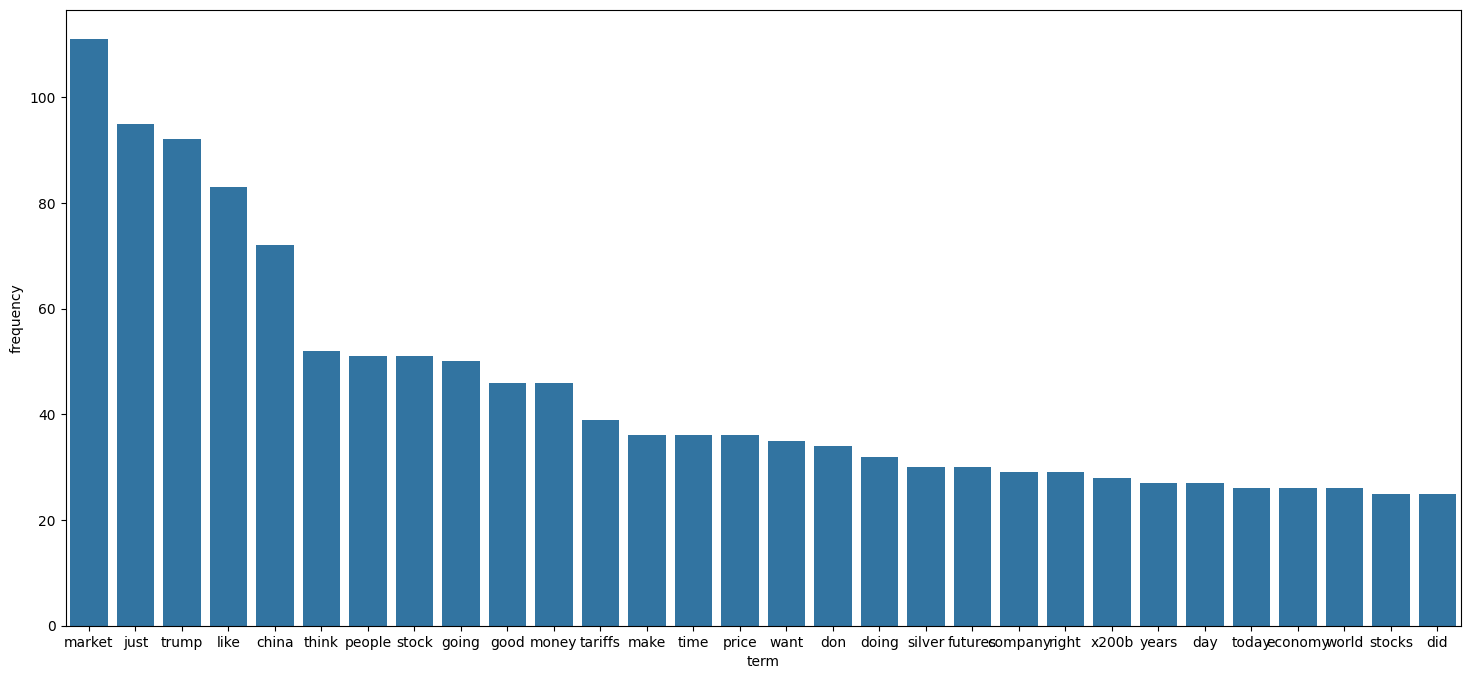

In [18]:
#詞彙出現頻率計算
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

#將其排序
terms = count_vect.get_feature_names_out()
df_terms = pd.DataFrame({"term": terms, "frequency": term_frequencies})
df_terms = df_terms.sort_values(by="frequency", ascending=False)

#選"前30"常出現的詞彙畫成圖表
plt.figure(figsize=(18,8))
sns.barplot(x="term", y="frequency", data=df_terms.head(30))
plt.xticks(rotation=0)
plt.show()


In [19]:
#用plotly呈現
fig = px.bar(df_terms.head(30), x="term", y="frequency", 
             title="Top 30 Terms")
fig.show()

#log減少差異
import math

df_terms["frequency_log"] = df_terms["frequency"].apply(lambda x: math.log(x+1))

fig = px.bar(df_terms.head(30), x="term", y="frequency_log",
             title="Top 30 Terms")
fig.show()



## 視覺化圖形

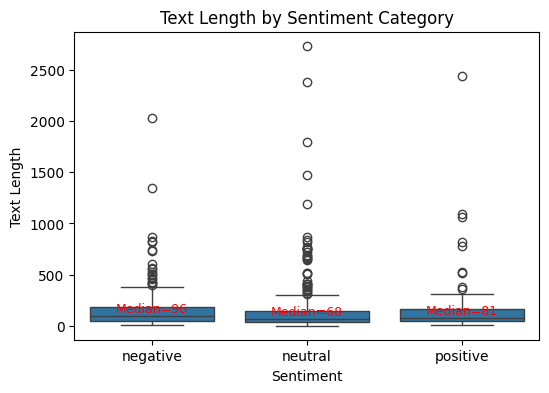

In [20]:
#文字長度看來在情緒的辨識上沒有太大的差異

#建立文字長度欄位
df["text_length"] = df["text"].astype(str).apply(len)

plt.figure(figsize=(6,4))
sns.boxplot(x="category_name", y="text_length", data=df)
plt.title("Text Length by Sentiment Category")
plt.xlabel("Sentiment")
plt.ylabel("Text Length")

#在圖上標註中位數
medians = df.groupby("category_name")["text_length"].median()
for i, median in enumerate(medians):
    plt.text(i, median + 2, f"Median={int(median)}", 
             ha='center', va='bottom', fontsize=9, color="red")

plt.show()


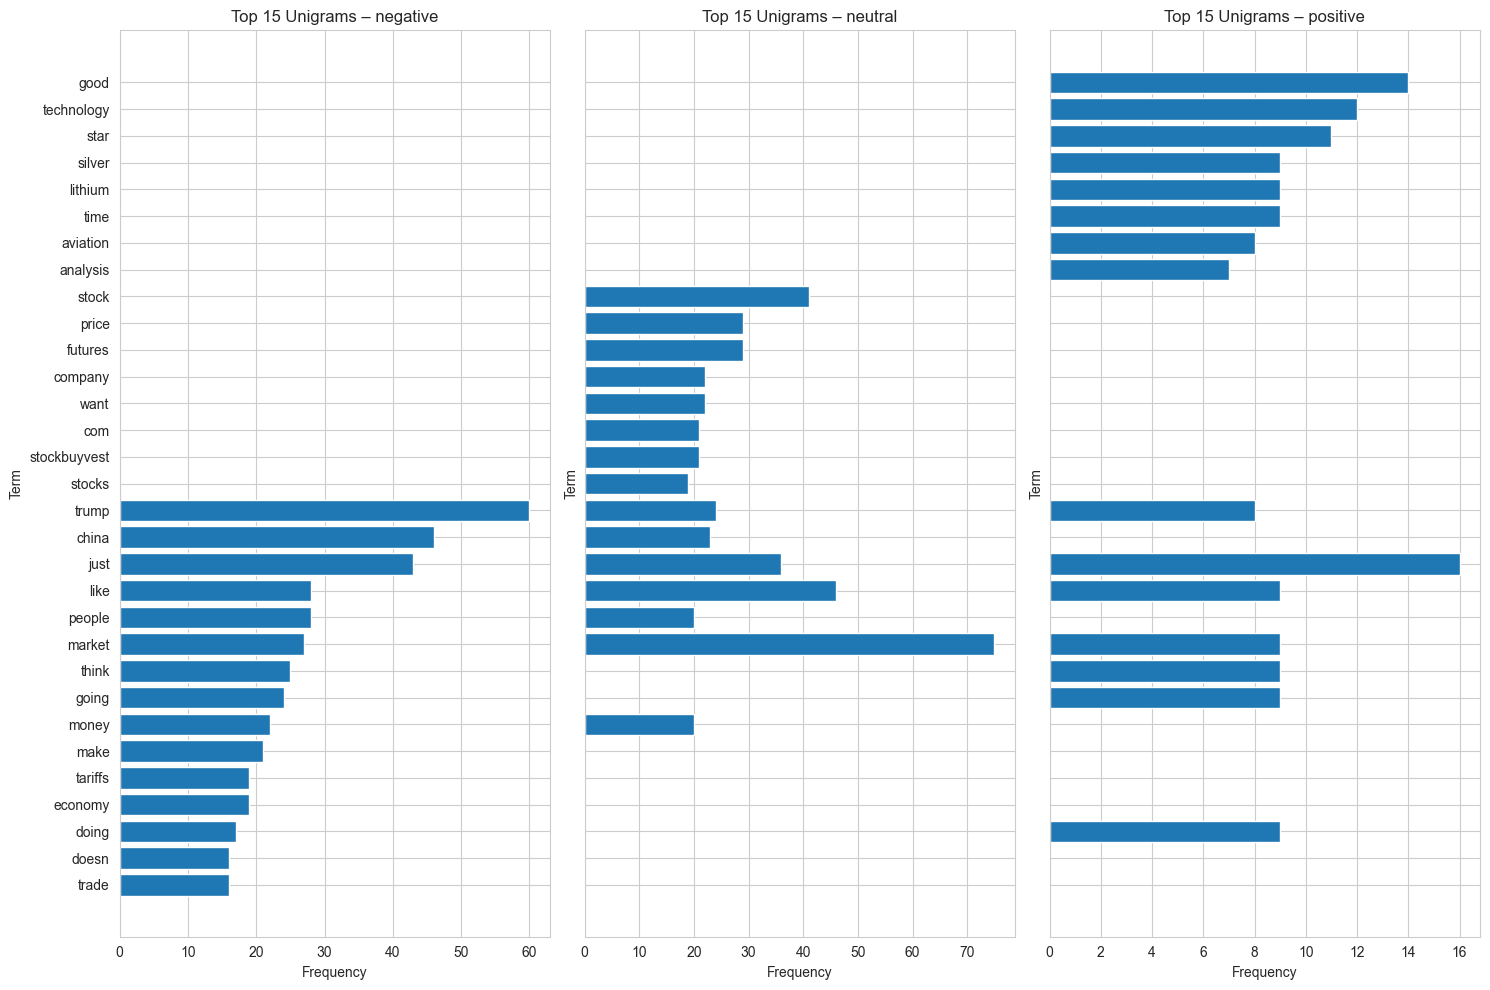

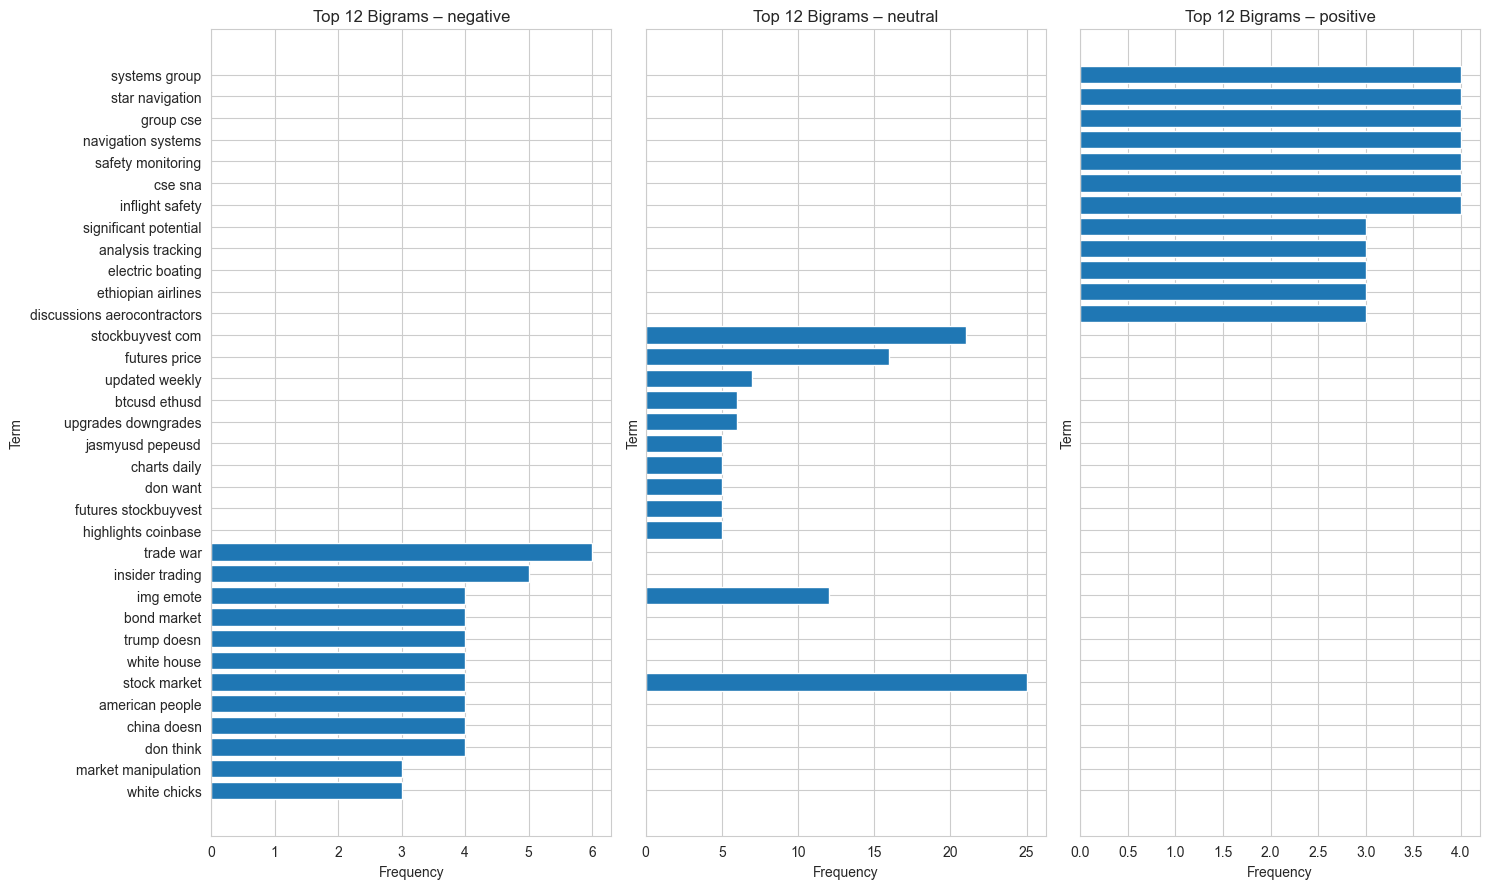

In [21]:
#一開始我用文字長度來比較不同情緒的差異，但結果看不出明顯差別。
#單純統計字數並不能解釋情緒上的不同，所以我改從詞彙的角度來觀察，把文字斷詞後，
#分別挑出正向、中立、負向三種情緒中最常出現的單字和雙詞組合。
#這樣能更清楚看出哪些詞跟不同情緒比較有關，也比單純字數的比較更有意義。


#確保有category_name
label_map = {1.0: "positive", 0.0: "neutral", -1.0: "negative"}
if "category_name" not in df.columns:
    df["category"] = df["label"]
    df["category_name"] = df["label"].map(label_map)

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
sns.set_style("whitegrid")


#抓Top-N單詞或雙詞
def top_ngrams_for_class(frame, label_col, label_value, text_col="text",
                         ngram_range=(1,1), topn=15):
    sub = frame[frame[label_col] == label_value]
    vect = CountVectorizer(stop_words="english", ngram_range=ngram_range,
                           token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b")  # 只保留至少兩個字母的詞
    Xc = vect.fit_transform(sub[text_col].astype(str))
    freqs = np.asarray(Xc.sum(axis=0)).ravel()
    terms = vect.get_feature_names_out()
    out = pd.DataFrame({"term": terms, "freq": freqs}).sort_values("freq", ascending=False).head(topn)
    return out

#圖Ａ：每個情緒的Top-15單字
topn = 15
cats = ["negative", "neutral", "positive"]
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)
for ax, c in zip(axes, cats):
    top_uni = top_ngrams_for_class(df, "category_name", c, ngram_range=(1,1), topn=topn)
    ax.barh(top_uni["term"][::-1], top_uni["freq"][::-1])
    ax.set_title(f"Top {topn} Unigrams – {c}")
    ax.set_xlabel("Frequency"); ax.set_ylabel("Term")
plt.tight_layout(); plt.show()

#圖B：每個情緒的Top-15雙詞(雙詞＝兩個單字組合而成)
topn_bi = 12
fig, axes = plt.subplots(1, 3, figsize=(15, 9), sharey=True)
for ax, c in zip(axes, cats):
    top_bi = top_ngrams_for_class(df, "category_name", c, ngram_range=(2,2), topn=topn_bi)
    ax.barh(top_bi["term"][::-1], top_bi["freq"][::-1])
    ax.set_title(f"Top {topn_bi} Bigrams – {c}")
    ax.set_xlabel("Frequency"); ax.set_ylabel("Term")
plt.tight_layout(); plt.show()


#這樣就可以清楚地看出三種情緒的各跟哪些語詞有關，幫助我們理解電腦是靠這些詞來判斷情緒的。


# Phase 2

In [22]:
### Begin Assignment Here